# Figuras apunte Aprendizaje de máquinas

__Notas__: Se puede ejecutar el notebook de forma completa y obtener todas las figuras.

__Parametros__: Los parámetros(para guardar las figuras, distintos casos, etc...) se encuentran en paréntesis de la forma:

########################################################

param = value # posible_values
########################################################

__Modulos extra__ (adicionales a la instalación por defecto de Anaconda):
* Seaborn.
* Numba.

In [2]:
%matplotlib inline
# vanilla imports
import time

# conda imports
import numpy as np

# puntual imports
from scipy.optimize import fmin_l_bfgs_b as fmin
from numba import jit
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_circles
from matplotlib.patches import Ellipse

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA, KernelPCA

# figure import
import matplotlib.pyplot as plt
import seaborn as sns
# puntual figure imports
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
###################################################
figure_width = 12
###################################################

sns.set_context('paper', font_scale=1.8)
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (figure_width, 4)
out_path = 'img/'

###################################################
savefigs = True
###################################################

# CHAPTER 2: Linear regression

In [7]:
# chapter prefix for figures
prefix = 'cap1_'

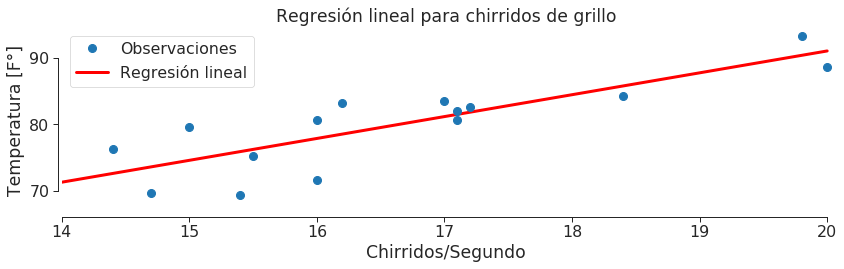

In [4]:
D = np.loadtxt('datos/crickets.csv', delimiter=',')

a, b = np.polyfit(D[:, 0], D[:, 1], deg=1)

plt.plot(D[:, 0], D[:, 1], 'o', label='Observaciones', ms=8,  zorder=2)
plt.plot(np.arange(13, 21), np.arange(13, 21) * a + b, 'r', lw=3, zorder=1, label='Regresión lineal')
plt.xlabel('Chirridos/Segundo')
plt.ylabel('Temperatura [F°]')
plt.xlim(14 , 20.03)
plt.title('Regresión lineal para chirridos de grillo')
plt.legend()

plt.tight_layout()
sns.despine(offset=4, trim=True)
if savefigs: plt.savefig(out_path + prefix + 'chirridos.pdf', bbox_inches='tight')

# CHAPTER 3: Regresion no lineal

In [5]:
prefix = 'cap2_'

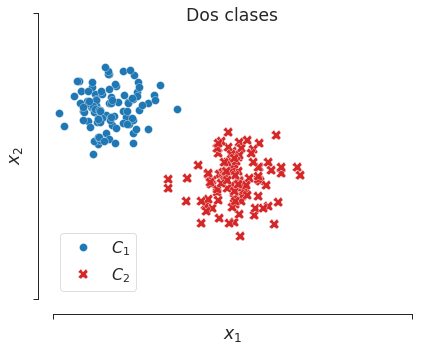

In [6]:
np.random.seed(3)

# center for clusters
centers = [[1, 4], [3, 2.5]]
# standar deviation 
std = 0.4

# make points
x, y = make_blobs(n_samples=200, n_features=2, centers=centers, cluster_std=std)

#plot
plt.figure(figsize=(6, 5))
plt.plot(x[y==0, 0], x[y==0, 1] ,'o', markeredgecolor='w', markeredgewidth=0.3, ms=8, label=r'$C_1$')
plt.plot(x[y==1, 0], x[y==1, 1] ,'X', markeredgecolor='w', markeredgewidth=0.3, ms=10, c=sns.color_palette()[3],
        label=r'$C_2$')
plt.xlim(0, 6)
plt.ylim(0, 5)

plt.xticks([0, 6], labels=[])
plt.yticks([0, 6], labels=[])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend(loc='lower left')
plt.title('Dos clases', y=0.95)

plt.tight_layout()
sns.despine(offset=15, trim=True)
if savefigs: plt.savefig(out_path + prefix + 'dosclases.pdf', bbox_inches='tight')

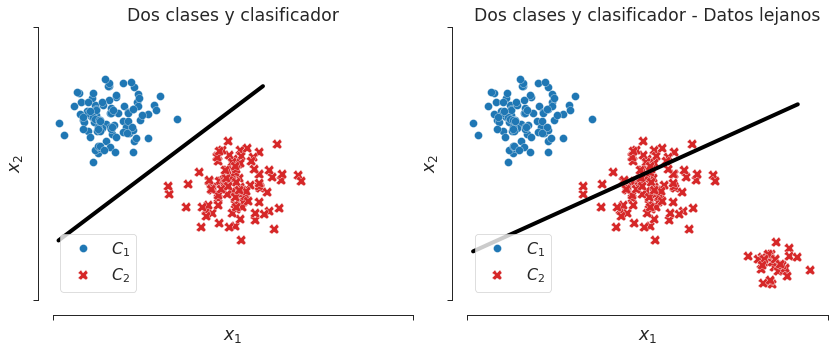

In [7]:
a, b = 1.2, 1

lin = np.linspace(0.1, 3.5, 10)

plt.figure(figsize=(figure_width, 5))
#plot
plt.subplot(121)
plt.plot(lin, lin * b + a, 'k', lw=4)
plt.plot(x[y==0, 0], x[y==0, 1] ,'o', markeredgecolor='2', markeredgewidth=0.3, ms=8, label=r'$C_1$')
plt.plot(x[y==1, 0], x[y==1, 1] ,'X', markeredgecolor='2', markeredgewidth=0.3, ms=10, c=sns.color_palette()[3],
        label=r'$C_2$')
plt.xlim(0, 6)
plt.ylim(0, 5)

plt.xticks([0, 6], labels=[])
plt.yticks([0, 6], labels=[])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend(loc='lower left')
plt.title('Dos clases y clasificador')

# center for clusters
centers = [[5.1, 0.8]]
# standar deviation 
std = 0.2

# make points
x2, y2 = make_blobs(n_samples=30, n_features=2, centers=centers, cluster_std=std)

a, b = 1, 0.6

lin = np.linspace(0.1, 5.5, 10)

plt.subplot(122)
#plot

plt.plot(lin, lin * b + a, 'k', lw=4, zorder=5)
plt.plot(x[y==0, 0], x[y==0, 1] ,'o', markeredgecolor='w', markeredgewidth=0.3, ms=8, label=r'$C_1$')
plt.plot(x[y==1, 0], x[y==1, 1] ,'X', markeredgecolor='w', markeredgewidth=0.3, ms=10, c=sns.color_palette()[3],
        label=r'$C_2$')
plt.plot(x2[:, 0], x2[:, 1] ,'X', markeredgecolor='w', markeredgewidth=0.3, ms=10, c=sns.color_palette()[3])
plt.xlim(0, 6)
plt.ylim(0, 5)

plt.xticks([0, 6], labels=[])
plt.yticks([0, 6], labels=[])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend(loc='lower left')
plt.title('Dos clases y clasificador - Datos lejanos')

plt.tight_layout()
sns.despine(offset=15, trim=True)
if savefigs: plt.savefig(out_path + prefix + 'dosclases_clasificador.pdf', bbox_inches='tight')

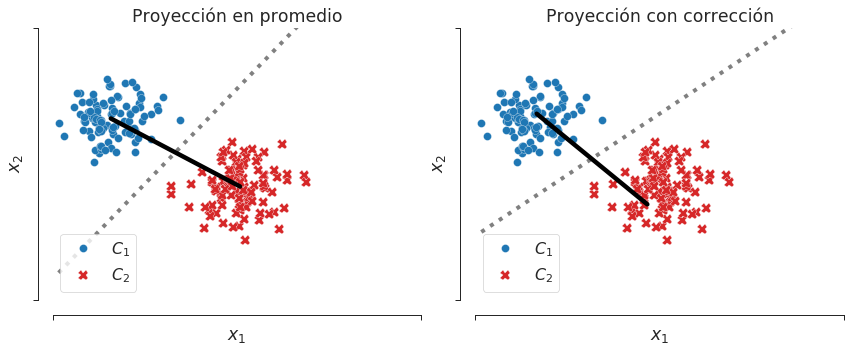

In [8]:
lin = np.linspace(0.1, 6, 2)

plt.figure(figsize=(figure_width, 5))

#plot 1

plt.subplot(121)

plt.plot([x[y==0, 0].mean(), x[y==1, 0].mean()],
         [x[y==0, 1].mean(), x[y==1, 1].mean()],
         'k',
         lw=4.5,
         zorder=5)

m2 = (x[y==1, 1].mean() - x[y==0, 1].mean()) / (x[y==1, 0].mean() - x[y==0, 0].mean())

plt.plot(lin, lin / -m2 + 0.45, ':', lw=4, c='gray')
plt.plot(x[y==0, 0], x[y==0, 1] ,'o', markeredgecolor='w', markeredgewidth=0.3, ms=8, label=r'$C_1$')
plt.plot(x[y==1, 0], x[y==1, 1] ,'X', markeredgecolor='w', markeredgewidth=0.3, ms=10, c=sns.color_palette()[3],
        label=r'$C_2$')
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.xticks([0, 6], labels=[])
plt.yticks([0, 6], labels=[])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend(loc='lower left')
plt.title('Proyección en promedio')

plt.subplot(122)

#plot 2

plt.plot([1, 2.8],
         [4.1, 2.1],
         'k',
         lw=4.5,
         zorder=5)
m3 = (2.1 - 4.1) / (2.8 - 1)

plt.plot(lin, lin / -m3 + 1.4, ':', lw=4, c='gray')

plt.plot(x[y==0, 0], x[y==0, 1] ,'o', markeredgecolor='w', markeredgewidth=0.3, ms=8, label=r'$C_1$')
plt.plot(x[y==1, 0], x[y==1, 1] ,'X', markeredgecolor='w', markeredgewidth=0.3, ms=10, c=sns.color_palette()[3],
        label=r'$C_2$')
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.xticks([0, 6], labels=[])
plt.yticks([0, 6], labels=[])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend(loc='lower left')
plt.title('Proyección con corrección')

plt.tight_layout()
sns.despine(offset=15, trim=True)
if savefigs: plt.savefig(out_path + prefix + 'dos_clases_proyeccion.pdf', bbox_inches='tight')

# CHAPTER 4: Model selection

In [9]:
# chapter prefix for figures
prefix = 'cap3_'

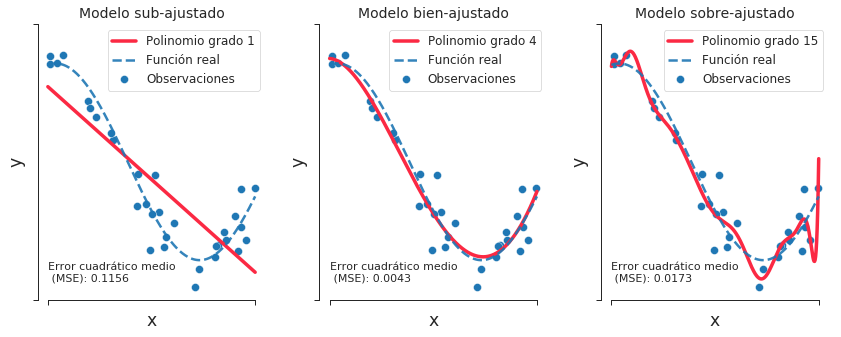

In [10]:
np.random.seed(1)
tamano_fuente = 12

# time array
t = np.linspace(0, 10, 400)
# phase
phi = 1.4
# generate sin
y = np.sin( 2 * np.pi * t * 0.072 + phi)

# generate observations
i_obs = np.random.choice(len(t), int(len(t) * 0.08), replace=False)
t_obs = t[i_obs]
y_obs = y[i_obs] + np.random.normal(scale=0.2, size=len(t_obs))

# polyfit

pol1 = np.polyfit(t_obs, y_obs, deg=1)
pol2 = np.polyfit(t_obs, y_obs, deg=4)
pol3 = np.polyfit(t_obs, y_obs, deg=15)

mse1 = ((np.polyval(pol1, t) - y)**2).mean()
mse2 = ((np.polyval(pol2, t) - y)**2).mean()
mse3 = ((np.polyval(pol3, t) - y)**2).mean()

# plot

plt.figure(figsize=(figure_width, 5))
# -----------------------------------------------------
plt.subplot(131)
plt.plot(t,
         np.polyval(pol1, t),
         c='xkcd:strawberry',
         lw=3.5,
         zorder=2,
         label='Polinomio grado 1')
plt.plot(t, y, '--',lw=2.5, zorder=3, label='Función real', alpha=0.9)
plt.plot(t_obs,
         y_obs,
         'o',
         c=sns.color_palette()[0],
         markeredgecolor='w',
         markeredgewidth=0.4,
         ms=8,
         zorder=1,
         label='Observaciones')

plt.text(0, -1.22, s='Error cuadrático medio \n (MSE): {:.4f}'.format(mse1), fontsize=tamano_fuente-1)

plt.xticks([0, 10], labels=[])
plt.yticks([-1.4, 1.4], labels=[])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=tamano_fuente)
plt.title('Modelo sub-ajustado', fontsize=tamano_fuente+2)
sns.despine(offset=0, trim=True)
# -----------------------------------------------------
plt.subplot(132)
plt.plot(t,
         np.polyval(pol2, t),
         c='xkcd:strawberry',
         lw=3.5,
         zorder=2,
         label='Polinomio grado 4')
plt.plot(t, y, '--',lw=2.5, zorder=3, label='Función real', alpha=0.9)
plt.plot(t_obs,
         y_obs,
         'o',
         c=sns.color_palette()[0],
         markeredgecolor='w',
         markeredgewidth=0.4,
         ms=8,
         zorder=1,
         label='Observaciones')
        
plt.text(0, -1.22, s='Error cuadrático medio \n (MSE): {:.4f}'.format(mse2),  fontsize=tamano_fuente-1)

plt.xticks([0, 10], labels=[])
plt.yticks([-1.4, 1.4], labels=[])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=tamano_fuente)
plt.title('Modelo bien-ajustado', fontsize=tamano_fuente+2)
sns.despine(offset=0, trim=True)

# -----------------------------------------------------
plt.subplot(133)
plt.plot(t,
         np.polyval(pol3, t),
         c='xkcd:strawberry',
         lw=3.5,
         zorder=2,
         label='Polinomio grado 15')
plt.plot(t, y, '--',lw=2.5, zorder=3, label='Función real', alpha=0.9)
plt.plot(t_obs,
         y_obs,
         'o',
         c=sns.color_palette()[0],
         markeredgecolor='w',
         markeredgewidth=0.4,
         ms=8,
         zorder=1,
         label='Observaciones')
plt.text(0, -1.22, s='Error cuadrático medio \n (MSE): {:.4f}'.format(mse3), fontsize=tamano_fuente-1)


plt.xticks([0, 10], labels=[])
plt.yticks([-1.4, 1.4], labels=[])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=tamano_fuente)
plt.title('Modelo sobre-ajustado', fontsize=tamano_fuente+2)
sns.despine(offset=0, trim=True)

plt.tight_layout()
sns.despine(offset=0, trim=True)
if savefigs: plt.savefig(out_path + prefix + 'ajuste.pdf', bbox_inches='tight')

# CHAPTER 5: Neural Networks

# CHAPTER 6: Support Vector Machine

In [11]:
# chapter prefix for figures
prefix = 'cap5_'

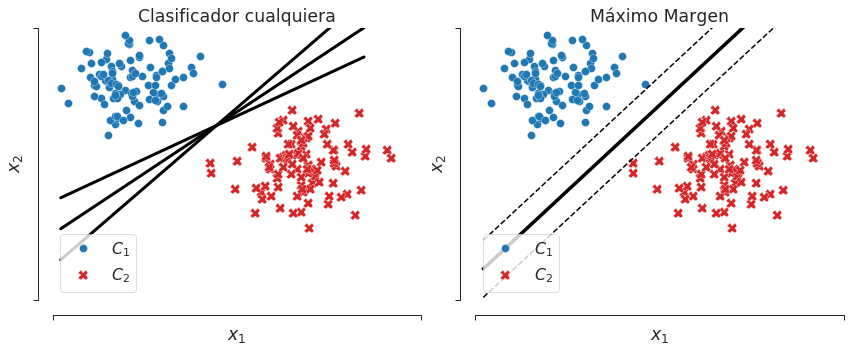

In [12]:
np.random.seed(3)

# center for clusters
centers = [[1, 4], [3, 2.5]]
# standar deviation 
std = 0.4

# make points
x, y = make_blobs(n_samples=200, n_features=2, centers=centers, cluster_std=std)

lin = np.linspace(0.1, 3.8, 10)

plt.figure(figsize=(figure_width, 5))

# black line parameters
a = np.array([1, 0.7, 1.3])
b = np.array([1.2, 1.8, 0.6])

# plot
# -------------------------------------------------------------------------
plt.subplot(121)

plt.plot(x[y==0, 0], x[y==0, 1] ,'o', markeredgecolor='w', markeredgewidth=0.3, ms=8, label=r'$C_1$')
plt.plot(x[y==1, 0], x[y==1, 1] ,'X', markeredgecolor='w', markeredgewidth=0.3, ms=10, c=sns.color_palette()[3],
        label=r'$C_2$')
plt.plot(lin, np.multiply.outer(lin, a) + b, '-k', lw=3)
plt.xlim(0, 4)
plt.ylim(0, 5)

plt.xticks([0, 4.5], labels=[])
plt.yticks([0, 5], labels=[])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend(loc='lower left')
plt.title('Clasificador cualquiera')

# plot 
# -------------------------------------------------------------------------
plt.subplot(122)

a2 = 1.4

plt.plot(x[y==0, 0], x[y==0, 1] ,'o', markeredgecolor='w', markeredgewidth=0.3, ms=8, label=r'$C_1$')
plt.plot(x[y==1, 0], x[y==1, 1] ,'X', markeredgecolor='w', markeredgewidth=0.3, ms=10, c=sns.color_palette()[3],
        label=r'$C_2$')
plt.plot(lin, lin * a2 + 0.95, '--k', lw=1.5)
plt.plot(lin, lin * a2 - 0.1, '--k', lw=1.5)
plt.plot(lin, lin * a2 + 0.85 / 2, '-k', lw=3.5)
plt.xlim(0, 4)
plt.ylim(0, 5)

plt.xticks([0, 4.5], labels=[])
plt.yticks([0, 5], labels=[])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend(loc='lower left')
plt.title('Máximo Margen')

plt.tight_layout()
sns.despine(offset=15, trim=True)
if savefigs: plt.savefig(out_path + prefix + 'max_margen.pdf', bbox_inches='tight')

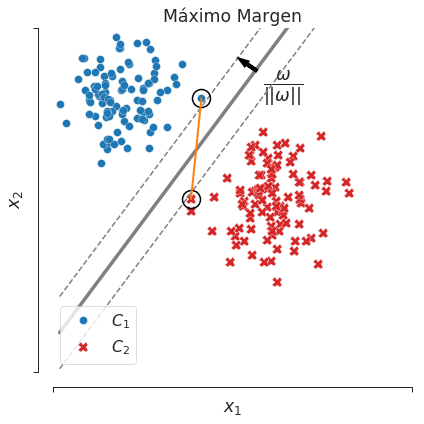

In [13]:
np.random.seed(3)

# center for clusters
centers = [[1, 4], [3, 2.5]]
# standar deviation 
std = 0.4

# make points
x, y = make_blobs(n_samples=200, n_features=2, centers=centers, cluster_std=std)

lin = np.linspace(0.1, 3.8, 20)

plt.figure(figsize=(6, 6))

# black line parameters
a = np.array([1, 0.7, 1.3])
b = np.array([1.2, 1.8, 0.6])

# plot
# -------------------------------------------------------------------------
a2 = 1.4



plt.plot(x[y==0, 0], x[y==0, 1] ,'o', markeredgecolor='w', markeredgewidth=0.3, ms=8, label=r'$C_1$')
plt.plot(x[y==1, 0], x[y==1, 1] ,'X', markeredgecolor='w', markeredgewidth=0.3, ms=10, c=sns.color_palette()[3],
        label=r'$C_2$')
plt.plot(lin, lin * a2 + 0.95, '--', lw=1.5, c='gray')
plt.plot(lin, lin * a2 - 0.1, '--', lw=1.5, c='gray')
plt.plot(lin, lin * a2 + 0.85 / 2, '-', lw=3.5, c='gray')


support_vector1 = np.argmax((x[y==0, 0]))
plt.plot(x[y==0, 0][support_vector1], x[y==0, 1][support_vector1],
         'o',
         markeredgecolor='k',
         markeredgewidth=1.5,
         markerfacecolor='none', 
         ms=18)

support_vector2 = np.argmin((x[y==1, 0]))
plt.plot(x[y==1, 0][support_vector2], x[y==1, 1][support_vector2],
         'o',
         markeredgecolor='k',
         markeredgewidth=1.5,
         markerfacecolor='none', 
         ms=18)

plt.plot([x[y==0, 0][support_vector1],x[y==1, 0][support_vector2]], 
         [x[y==0, 1][support_vector1], x[y==1, 1][support_vector2]],
        c=sns.color_palette()[1],
        lw=2)


plt.arrow(lin[14], lin[14] * a2 + 0.85/2, -.2, .2 / a2, color='k', lw=4, overhang=0, head_width=0.05, zorder=4,
          length_includes_head=True)

plt.text(lin[14] + .1, lin[14] * a2 + 0.85/2 - .3,
         r'$\frac{\omega}{||\omega||}$',
         fontsize=25,
         fontweight='heavy',
         zorder=1)

plt.xlim(0, 5)
plt.ylim(0, 5)

plt.xticks([0, 5], labels=[])
plt.yticks([0, 5], labels=[])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend(loc='lower left')
plt.title('Máximo Margen')

plt.tight_layout()
sns.despine(offset=15, trim=True)
if savefigs: plt.savefig(out_path + prefix + 'max_margen2.pdf', bbox_inches='tight')

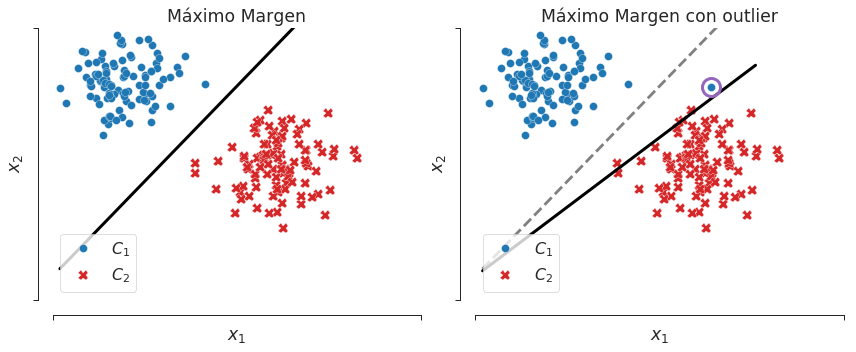

In [14]:
np.random.seed(3)

# center for clusters
centers = [[1, 4], [3, 2.5]]
# standar deviation 
std = 0.4

# make points
x, y = make_blobs(n_samples=200, n_features=2, centers=centers, cluster_std=std)

lin = np.linspace(0.1, 3.8, 20)

plt.figure(figsize=(figure_width, 5))

# black line parameters
a = np.array([1, 0.7, 1.3])
b = np.array([1.2, 1.8, 0.6])

plt.subplot(121)
# plot 1
# -------------------------------------------------------------------------
a2 = 1.4


plt.plot(x[y==0, 0], x[y==0, 1] ,'o', markeredgecolor='w', markeredgewidth=0.3, ms=8, label=r'$C_1$')
plt.plot(x[y==1, 0], x[y==1, 1] ,'X', markeredgecolor='w', markeredgewidth=0.3, ms=10, c=sns.color_palette()[3],
        label=r'$C_2$')

plt.plot(lin, lin * a2 + 0.85 / 2, '-', lw=3, c='k')

plt.xlim(0, 5)
plt.ylim(0, 5)

plt.xticks([0, 5], labels=[])
plt.yticks([0, 5], labels=[])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend(loc='lower left')
plt.title('Máximo Margen')


# plot 2
# -------------------------------------------------------------------------
plt.subplot(122)

a2 = 1.4


plt.plot(x[y==0, 0], x[y==0, 1] ,'o', markeredgecolor='w', markeredgewidth=0.3, ms=8, label=r'$C_1$')
plt.plot(x[y==1, 0], x[y==1, 1] ,'X', markeredgecolor='w', markeredgewidth=0.3, ms=10, c=sns.color_palette()[3],
        label=r'$C_2$')

plt.plot(lin, lin * a2 + 0.85 / 2, '--', lw=2.8, c='gray')

plt.plot(lin, lin * a2 * .73 + 0.85 / 2, '-', lw=3, c='k')

plt.plot([3.2], [3.9] ,'o', markeredgecolor='w', markeredgewidth=0.3, ms=8, c=sns.color_palette()[0])

plt.plot([3.2], [3.9],
         'o',
         markeredgecolor=sns.color_palette()[4],
         markeredgewidth=3,
         markerfacecolor='none', 
         ms=18,
         zorder=3)

plt.xlim(0, 5)
plt.ylim(0, 5)

plt.xticks([0, 5], labels=[])
plt.yticks([0, 5], labels=[])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend(loc='lower left')
plt.title('Máximo Margen con outlier')

plt.tight_layout()
sns.despine(offset=15, trim=True)
if savefigs: plt.savefig(out_path + prefix + 'margen_suave.pdf', bbox_inches='tight')

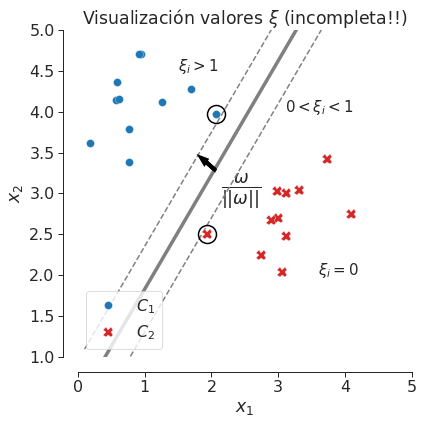

In [15]:
np.random.seed(3)

# center for clusters
centers = [[1, 4], [3, 2.5]]
# standar deviation 
std = 0.4

# make points
x, y = make_blobs(n_samples=200, n_features=2, centers=centers, cluster_std=std)

lin = np.linspace(0.1, 3.8, 20)

plt.figure(figsize=(6, 6))

# black line parameters
a = np.array([1, 0.7, 1.3])
b = np.array([1.2, 1.8, 0.6])

# plot
# -------------------------------------------------------------------------
a2 = 1.4

step = 10

plt.plot(x[y==0, 0][::step], x[y==0, 1][::step] ,'o', markeredgecolor='w', markeredgewidth=0.3, ms=8, label=r'$C_1$')
plt.plot(x[y==1, 0][::step], x[y==1, 1][::step] ,'X', markeredgecolor='w', markeredgewidth=0.3, ms=10, c=sns.color_palette()[3],
        label=r'$C_2$')
plt.plot(lin, lin * a2 + 0.95, '--', lw=1.5, c='gray')
plt.plot(lin, lin * a2 - 0.1, '--', lw=1.5, c='gray')
plt.plot(lin, lin * a2 + 0.85 / 2, '-', lw=3.5, c='gray')


support_vector1 = np.argmax((x[y==0, 0]))

plt.plot(x[y==0, 0][support_vector1], x[y==0, 1][support_vector1],
         'o',
         markeredgecolor='w',
         markeredgewidth=0.3,
         ms=8,
         c=sns.color_palette()[0])

plt.plot(x[y==0, 0][support_vector1], x[y==0, 1][support_vector1],
         'o',
         markeredgecolor='k',
         markeredgewidth=1.5,
         markerfacecolor='none', 
         ms=18)

support_vector2 = np.argmin((x[y==1, 0]))


plt.plot(x[y==1, 0][support_vector2], x[y==1, 1][support_vector2],
         'X',
         markeredgecolor='w',
         markeredgewidth=0.3,
         ms=10,
         c=sns.color_palette()[3])

plt.plot(x[y==1, 0][support_vector2], x[y==1, 1][support_vector2],
         'o',
         markeredgecolor='k',
         markeredgewidth=1.5,
         markerfacecolor='none', 
         ms=18)

plt.arrow(lin[10], lin[10] * a2 + 0.85/2, -.2, .2 / a2, color='k', lw=4, overhang=0, head_width=0.05, zorder=4,
          length_includes_head=True)

plt.text(lin[10] + .1, lin[10] * a2 + 0.85/2 - .3,
         r'$\frac{\omega}{||\omega||}$',
         fontsize=25,
         fontweight='heavy',
         zorder=1)

plt.text(3.6, 2,
         r'$\xi_{i} = 0$',
         fontsize=15,
         fontweight='bold',
         zorder=1)

plt.text(3.1, 4,
         r'$0 < \xi_{i} < 1$',
         fontsize=15,
         fontweight='bold',
         zorder=1)

plt.text(1.5, 4.5,
         r'$\xi_{i} > 1$',
         fontsize=15,
         fontweight='bold',
         zorder=1)

plt.xlim(0, 5)
plt.ylim(1, 5)

# plt.xticks([0, 5], labels=[])
# plt.yticks([1, 5], labels=[])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend(loc='lower left')
plt.title(r'Visualización valores $\xi$ (incompleta!!)')

plt.tight_layout()
sns.despine(offset=15, trim=True)
if savefigs: plt.savefig(out_path + prefix + 'max_margen3.pdf', bbox_inches='tight')

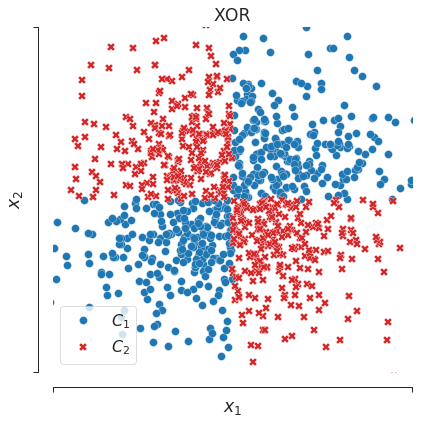

In [16]:
x, y = make_blobs(n_samples=1000, centers=[[0, 0]], cluster_std=.4)


plt.figure(figsize=(6, 6))

# Classes
cls1 = (x[:, 0] * x[:, 1]) > 0
cls2 = (x[:, 0] * x[:, 1]) < 0

plt.plot(x[:, 0][cls1], x[:, 1][cls1], 'o', markeredgecolor='w', markeredgewidth=0.3, ms=8, label=r'$C_1$')
plt.plot(x[:, 0][cls2], x[:, 1][cls2], 'X', markeredgecolor='w', markeredgewidth=0.3, ms=8, label=r'$C_2$', 
        c=sns.color_palette()[3])

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.xticks([-1, 1], labels=[])
plt.yticks([-1, 1], labels=[])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend(loc='lower left')

plt.title('XOR')

plt.tight_layout()
sns.despine(offset=15, trim=True)
if savefigs: plt.savefig(out_path + prefix + 'xor.pdf', bbox_inches='tight')

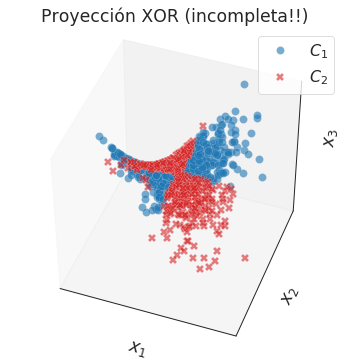

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')


ax.plot(x[:, 0][cls1], x[:, 1][cls1], x[:, 0][cls1] * x[:, 1][cls1],
        'o', markeredgecolor='w', markeredgewidth=0.2, ms=8, label=r'$C_1$', alpha=0.6)
ax.plot(x[:, 0][cls2], x[:, 1][cls2], x[:, 0][cls2] * x[:, 1][cls2],
        'X', markeredgecolor='w', markeredgewidth=0.2, ms=8, label=r'$C_2$', 
        c=sns.color_palette()[3], alpha=0.6)

angle = 110
ax.view_init(45, angle)
plt.draw()

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$x_3$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.legend()

plt.title('Proyección XOR (incompleta!!)')

sns.despine(offset=15, trim=True)

if savefigs: plt.savefig(out_path + prefix + 'xor_3d_proyeccion.pdf', bbox_inches='tight')

In [18]:
# import svm 

from sklearn.svm import SVC

clf_poly = SVC(kernel='poly', degree=4, gamma='auto')
clf_rbf = SVC(kernel='rbf', gamma='auto')

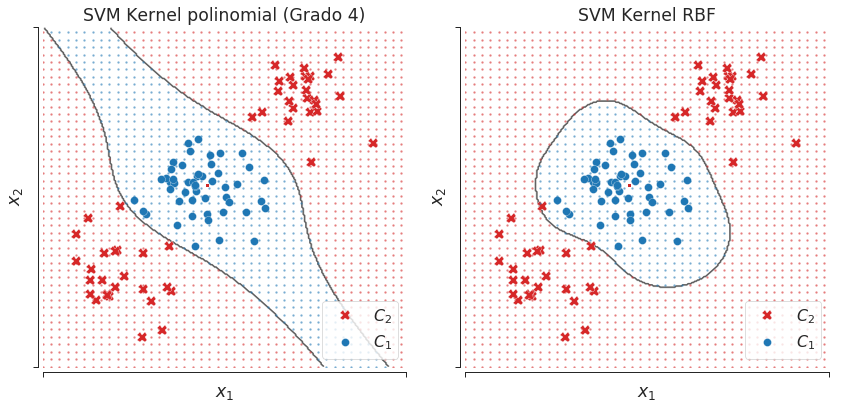

In [19]:
# random seed
np.random.seed(1)

# centers
centers1 = [[-2.8, -2.8], [2.8, 2.8]]
centers2 = [[0, 0]]

x1, y1 = make_blobs(n_samples=50, centers=centers1, cluster_std=1)
x2, y2 = make_blobs(n_samples=50, centers=centers2, cluster_std=1)

y1 = np.full(y1.shape, 0)
y2 = np.full(y2.shape, 1)

# concatenate
X = np.r_[x1, x2]
y = np.r_[y1, y2]

# train svm's

clf_poly.fit(X, y)
clf_rbf.fit(X, y)

# predict area

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.25),
                     np.arange(y_min, y_max, 0.25))

Z1 = clf_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

Z2 = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, 0.04),
                     np.arange(y_min, y_max, 0.04))

Z1_2 = clf_poly.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z1_2 = Z1_2.reshape(xx2.shape)

Z2_2 = clf_rbf.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z2_2 = Z2_2.reshape(xx2.shape)


# ---Plot---

plt.figure(figsize=(figure_width, 6))

plt.subplot(121)
plt.plot(x1[:, 0], x1[:, 1],
         'X',
         markeredgecolor='w',
         markeredgewidth=0.3,
         ms=10,
         label=r'$C_2$',
         c=sns.color_palette()[3])
plt.plot(x2[:, 0], x2[:, 1],
         'o',
         markeredgecolor='w',
         markeredgewidth=0.3,
         ms=8,
         label=r'$C_1$',
         c=sns.color_palette()[0])

plt.contour(xx2, yy2, Z1_2, alpha=0.4, cmap='binary')

plt.plot((xx * Z1), yy * Z1, '.', c=sns.color_palette()[0], alpha=0.4, ms=3)
plt.plot(xx * (1 - Z1), yy * (1 - Z1), '.', c=sns.color_palette()[3], alpha=0.4, ms=3)


plt.legend()
plt.title('SVM Kernel polinomial (Grado 4)')

plt.xticks([x_min, x_max], labels=[])
plt.xlabel(r'$x_1$')

plt.yticks([y_min, y_max], labels=[])
plt.ylabel(r'$x_2$')
sns.despine(offset=5, trim=True)
plt.legend(loc='lower right')

# ------------------------------------------------------------------------

plt.subplot(122)
plt.plot(x1[:, 0], x1[:, 1],
         'X',
         markeredgecolor='w',
         markeredgewidth=0.3,
         ms=10,
         label=r'$C_2$',
         c=sns.color_palette()[3])
plt.plot(x2[:, 0], x2[:, 1],
         'o',
         markeredgecolor='w',
         markeredgewidth=0.3,
         ms=8,
         label=r'$C_1$',
         c=sns.color_palette()[0])

plt.contour(xx2, yy2, Z2_2, alpha=0.4, cmap='binary')
plt.plot(xx * Z2, yy * Z2, '.', c=sns.color_palette()[0], alpha=0.4, ms=3)
plt.plot(xx * (1 - Z2), yy * (1 - Z2), '.', c=sns.color_palette()[3], alpha=0.4, ms=3)

plt.legend(loc='lower right')
plt.title('SVM Kernel RBF')

plt.xticks([x_min, x_max], labels=[])
plt.xlabel(r'$x_1$')

plt.yticks([y_min, y_max], labels=[])
plt.ylabel(r'$x_2$')
sns.despine(offset=5, trim=True)

plt.tight_layout()

if savefigs: plt.savefig(out_path + prefix + 'svm_2kernels.pdf', bbox_inches='tight')

# CHAPTER 7:GP

In [20]:
# chapter prefix for figures
prefix = 'cap6_'

In [21]:
@jit
def SE(a, b, gamma=1. / 2, sigma=1):
    """
    Square Exponential kernel
    returns the evaluation of the kernel
    k(a,b)=sigma**2*exp(-gamma*(a-b)**2),
    notice that in this definition gamma = 1 /(2*lengthscale**2), in order to simplify the derivatives
    for consistency with the generation of Gram matrices, this function returns
    a matrix of dimensions dim(a) x dim(b);
    
    INPUTS
    a,b are column vectors of (possibly) different lenghts
    """
    sa = np.size(a)
    sb = np.size(b)

    if sa == 1: a = np.array([a])
    if sb == 1: b = np.array([b])
    K = np.zeros([sa, sb])
    #accelerate computation if a==b
    if np.array_equal(a, b):
        for va in range(sa):
            K[va, va] = 1
            for vb in range(va + 1, sb):
                K[va, vb] = np.exp(-(a[va] - b[vb])**2 * gamma)
                K[vb, va] = K[va, vb]
    #a!=b
    else:
        for va in range(sa):
            for vb in range(sb):
                K[va, vb] = np.exp(-(a[va] - b[vb])**2 * gamma)
    if sa == 1:
        return sigma**2 * np.reshape(K, b.shape)
    elif sb == 1:
        return sigma**2 * np.reshape(K, a.shape)
    else:
        return sigma**2 * K
    
    
#negative log-likelihood when using SE kernel
def like_SE(X, y, t):

    #entrenamiento con respecto al logaritmo de los hyperparámetros, para no imponer restricciones de positividad
    sigma_noise, gamma_1, sig_1 = np.exp(X)
    Gram = SE(
        t, t, gamma=gamma_1,
        sigma=sig_1) + sigma_noise**2 * np.identity(len(t))
    cGg = np.linalg.cholesky(Gram)
    invGram = np.dot(np.linalg.inv(cGg.T), np.linalg.inv(cGg))
    nll = np.dot(y, np.dot(invGram, y)) + 2 * np.sum(np.log(np.diag(cGg)))
    return 0.5 * nll + 0.5 * len(y) * np.log(2 * np.pi)

#negative log-likelihood when using SE kernel
def like_SE_divided(X, y, t):

    #entrenamiento con respecto al logaritmo de los hyperparámetros, para no imponer restricciones de positividad
    sigma_noise, gamma_1, sig_1 = np.exp(X)
    Gram = SE(
        t, t, gamma=gamma_1,
        sigma=sig_1) + sigma_noise**2 * np.identity(len(t))
    cGg = np.linalg.cholesky(Gram)
    invGram = np.dot(np.linalg.inv(cGg.T), np.linalg.inv(cGg))
    nll_1 = np.sum(np.log(np.diag(cGg)))
    nll_2 = 0.5 * np.dot(y, np.dot(invGram, y))
    nll_3 = 0.5 * len(y) * np.log(2 * np.pi)
    
    return nll_1, nll_2, nll_3


#derivative of negative log-likelihood when using SE kernel
def like_SE_Df(X, y, t):
    sigma_noise, gamma_1, sig_1 = np.exp(X)
    Gram0 = SE(t, t, gamma=gamma_1, sigma=sig_1)
    Gram = Gram0 + sigma_noise**2 * np.identity(len(t))
    cGg = np.linalg.cholesky(Gram)
    invGram = np.dot(np.linalg.inv(cGg.T), np.linalg.inv(cGg))
    A = np.dot(invGram, y)
    outer_sub = outersum(t, -t)  #matriz donde el(ij) = t[i]-[]
    D1 = 2 * sigma_noise**2 * np.identity(len(t))  #sigma_noise
    D2 = -Gram0 * outer_sub**2 * gamma_1  #gamma_1
    D3 = 2 * Gram0  #sig_1

    B = np.outer(A, A) - invGram
    d1 = -np.trace(np.dot(B, D1))
    d2 = -np.trace(np.dot(B, D2))
    d3 = -np.trace(np.dot(B, D3))
    #print(['Derivatives: ', d1, d2, d3])
    return np.asarray([0.5 * d1, 0.5 * d2, 0.5 * d3])


# "suma" externa
def outersum(a, b):
    return np.outer(a, np.ones_like(b)) + np.outer(np.ones_like(a), b)

In [22]:
def RQ(a, b, theta=[1, 1, 1]):
    gamma, alpha, sigma = theta
    return sigma**2 * (1 + gamma * (a - b)**2 / alpha)**(-alpha)

def P(a, b, theta=[1, 1, 1]):
    gamma, p, sigma = theta
    aux = np.exp(-4 * gamma * np.sin(np.pi * np.abs(a - b) / p)**2)
    return aux * sigma**2

@jit
def kernels(a, b, theta=[1, 1, 1], kernel=RQ):
    """
    Computes gram matrix with selected kernel
    kernel is a function with 3 parameters, input1, input2 and 
    kernel parameters
    """
    if np.ndim(a) == 0: a = np.array([a])
    if np.ndim(b) == 0: b = np.array([b])

    gram = np.zeros((len(a), len(b)))

    if len(a) == len(b):
        for i, va in enumerate(a):
            for j, vb in enumerate(b):
                gram[i, j] = kernel(va, vb, theta)
                gram[j, i] = gram[i, j]
    else:
        for i, va in enumerate(a):
            for j, vb in enumerate(b):
                gram[i, j] = (1 + gamma * (va - vb)**2 / alpha)**alpha

    if (len(a) == 1) or (len(b) == 1):
        return gram.reshape(-1)
    else:
        return gram

## SE prior samples

In [23]:
n_points = 500
t = np.linspace(0, 100, n_points)
m = np.zeros(n_points)
sigma = 2
l = np.array([1, 2, 6, 15])

(5, 500)
(5, 500)
(5, 500)
(5, 500)


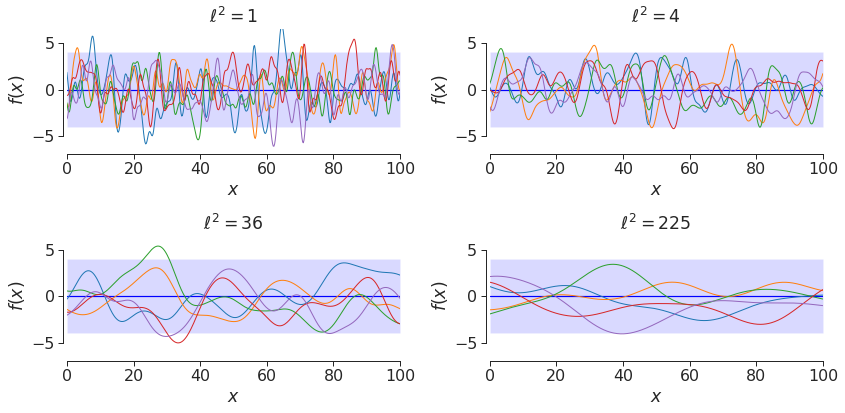

In [24]:
np.random.seed(123)

n_to_plot = 5

# f, axarr = plt.subplots(2, 2, sharex=True, sharey=True)
plt.figure(figsize=(figure_width, 6))

for ind, i in enumerate(l):
    gram = SE(t, t, 1 / (2*i**2), sigma)
    samples = np.random.multivariate_normal(m, gram, size=n_to_plot)
    print(samples.shape)
    #     axarr[ind].plot(t, samples)
    plt.subplot(2, 2, ind + 1)
    plt.plot(t, m, 'blue')
    plt.plot(t, samples.T, lw=1)
    plt.fill_between(
        t,
        m + 2 * sigma,
        m - 2 * sigma,
        facecolor='blue',
        alpha=0.15,
        label='95% CI')
    
    plt.xlabel(r'$x$')
    plt.ylabel(r'$f(x)$')
    plt.title(r'$\ell^2={}$'.format(i**2))
    plt.xlim(0, 100)
    plt.ylim(-6.5, 6.5)

plt.tight_layout()
sns.despine(offset=4, trim=True)
if savefigs: plt.savefig(out_path + prefix + 'gp_prior_muestras.pdf', bbox_inches='tight')


## Función analitica para jugar

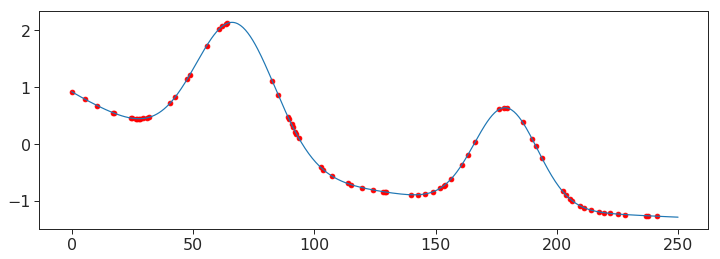

In [25]:
np.random.seed(666)

n_points = 500
# time array
t = np.linspace(0, 250, n_points)
# parameters
b = np.array([
    9.877821e1, 1.049727e-2, 1.004899e2, 6.748111e1, 2.312977e1, 7.19945e1,
    1.789980e2, 1.838938e1
])
# function
y = b[0] * np.exp(-b[1] * t) + b[2] * np.exp(
    -(t - b[3])**2 / b[4]**2) + b[5] * np.exp(-(t - b[6])**2 / b[7]**2)
# normalise
y = (y - y.mean()) / y.std()
# get copy to add noise later
y_real = y.copy()

# generate observations
percent = 0.15 # percentage of all observations
i_obs = np.random.choice(
    np.arange(0, n_points, 1), int(percent * n_points), replace=False)
# assign observations
y_obs = y[i_obs]
t_obs = t[i_obs]
N_obs = len(y_obs)

# plt.plot(t, y)
plt.plot(t, y_real)
plt.scatter(t_obs, y_obs, c='r')

Negative log-likelihood para hiperámetros escogidos:  147.4580038309968


/home/alejandro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


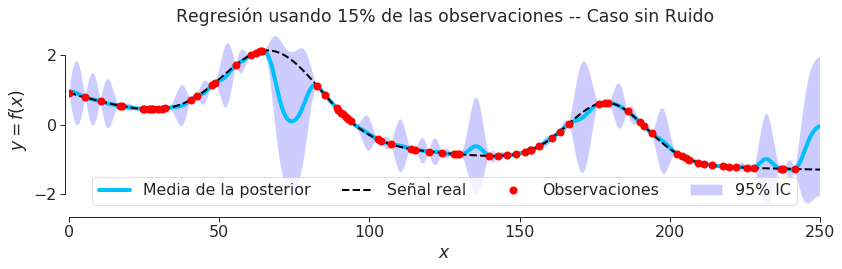

In [26]:
# elegir hiperparámetros
sigma_y_GP_test = 0
# gamma_test = 0.01
gamma_test = 0.05
sigma_test = 1

# NLL para la elección de hiperparámetros
print('Negative log-likelihood para hiperámetros escogidos: ',
      like_SE([sigma_y_GP_test, gamma_test, sigma_test], y_obs, t_obs))

# covarianza a priori del proceso
cov = SE(t, t, gamma=gamma_test, sigma=sigma_test)

# covarianza a priori de las observaciones
cov_obs = SE(t_obs, t_obs, gamma=gamma_test, sigma=sigma_test)

# evaluación kernel entre observaciones y puntos a estimar
K_star = SE(t, t_obs, gamma=gamma_test, sigma=sigma_test)

# cholesky
cGg = np.linalg.cholesky(cov_obs)

# inversa matriz de covarianza (Gram)
invGramg = np.dot(np.linalg.inv(cGg.T), np.linalg.inv(cGg))

temp = np.dot(K_star, invGramg)
y_model = np.dot(temp, y_obs)
v_model = np.diag(cov - np.dot(temp, K_star.T))
std_dev = np.sqrt(v_model)

# graficar estimación, observaciones y datos reales
fig = plt.figure(2, figsize=(figure_width, 4))
ax = plt.gca()
plt.plot(t, y_model, c='#00BFFF', lw=4, label='Media de la posterior')
plt.fill_between(
    t,
    y_model - 2 * std_dev,
    y_model + 2 * std_dev,
    facecolor='blue',
    alpha=0.2,
    label='95% IC')
plt.plot(t, y_real, color='black', ls='--', lw=2, label='Señal real')
plt.plot(t_obs, y_obs, 'r.', ms=14, label='Observaciones')
plt.legend(ncol=4, loc='lower center')
plt.xlabel(r'$x$')
plt.ylabel(r'$y=f(x)$')
plt.xlim(0, 250)
plt.title('Regresión usando {}% de las observaciones -- Caso sin Ruido'.format(int(percent*100)))
plt.tight_layout()
sns.despine(offset=4, trim=True)

if savefigs: plt.savefig(out_path + prefix + 'gp_posterior_no_ruido.pdf', bbox_inches='tight')

In [27]:
# add noise
y += np.random.normal(scale=0.2, size=n_points)

y_obs = y[i_obs]
t_obs = t[i_obs]
N_obs = len(y_obs)

Negative log-likelihood para hiperámetros escogidos:  150.5680051279473


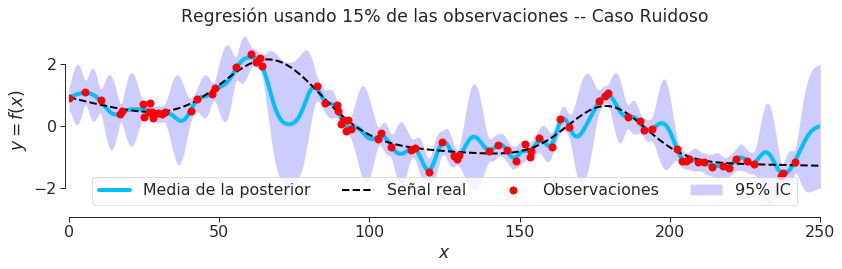

In [28]:
#elegir hiperparámetros
sigma_y_GP_test = 0.2
# gamma_test = 0.01
gamma_test = 0.05
sigma_test = 1

#NLL para la elección de hiperparámetros
print('Negative log-likelihood para hiperámetros escogidos: ',
      like_SE([sigma_y_GP_test, gamma_test, sigma_test], y_obs, t_obs))

#covarianza a priori del proceso
cov = SE(t, t, gamma=gamma_test, sigma=sigma_test)

#covarianza a priori de las observaciones
cov_obs = SE(t_obs, t_obs, gamma=gamma_test, sigma=sigma_test)

#evaluación kernel entre observaciones y puntos a estimar
K_star = SE(t, t_obs, gamma=gamma_test, sigma=sigma_test)

#cholesky

cGg = np.linalg.cholesky(cov_obs + sigma_y_GP_test**2 * np.identity(N_obs))


#inversa matriz de covarianza (Gram)
invGramg = np.dot(np.linalg.inv(cGg.T), np.linalg.inv(cGg))

temp = np.dot(K_star, invGramg)
y_model = np.dot(temp, y_obs)
v_model = np.diag(cov - np.dot(temp, K_star.T))
std_dev = np.sqrt(v_model)

#graficar estimación, observaciones y datos reales
fig = plt.figure(2, figsize=(figure_width, 4))
ax = plt.gca()
plt.plot(t, y_model, c='#00BFFF', lw=4, label='Media de la posterior')
plt.fill_between(
    t,
    y_model - 2 * std_dev,
    y_model + 2 * std_dev,
    facecolor='blue',
    alpha=0.2,
    label='95% IC')
plt.plot(t, y_real, color='black', ls='--', lw=2, label='Señal real')
plt.plot(t_obs, y_obs, 'r.', ms=14, label='Observaciones')
plt.legend(ncol=4, loc='lower center')
plt.xlabel(r'$x$')
# plt.ylabel(r'$y=f(x) + \eta$')
plt.ylabel(r'$y=f(x)$')
plt.xlim(0, 250)
plt.title('Regresión usando {}% de las observaciones -- Caso Ruidoso'.format(int(percent*100)))
plt.tight_layout()
sns.despine(offset=4, trim=True)

if savefigs: plt.savefig(out_path + prefix + 'gp_posterior_ruido.pdf', bbox_inches='tight')

In [29]:
np.sqrt(1/(2 * gamma_test))

3.1622776601683795

In [30]:
theta = np.log(np.array([sigma_y_GP_test, gamma_test, sigma_test]))
like_SE(theta, y_obs, t_obs)

55.35385501532235

## NLL por partes
Decompose NLL by its 3 terms, and plot each one in function of nll

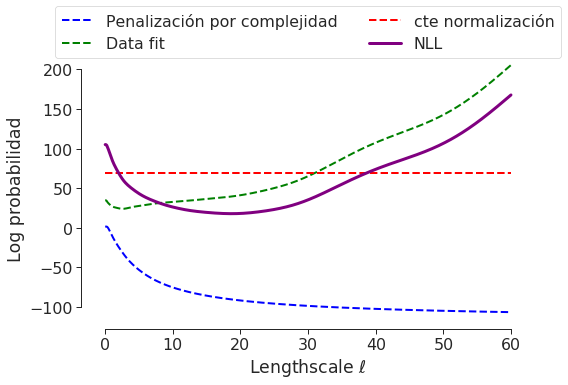

In [31]:
n_len = 500
lengthscale = np.linspace(0.001, 60, n_len)
sigma_noise = 0.2
sig_1 = 1

nll_parts = np.zeros((n_len, 3))
for i,l in enumerate(lengthscale):
    theta = np.log(np.array([sigma_noise, 1/(2 * l**2), sig_1]))
    nll_parts[i, :] = like_SE_divided(theta, y_obs, t_obs)
    

plt.figure(figsize=(8, 5))
plt.plot(lengthscale, nll_parts[:, 0], '--b', label='Penalización por complejidad', lw=2)
plt.plot(lengthscale, nll_parts[:, 1], '--g', label='Data fit', lw=2)
plt.plot(lengthscale, nll_parts[:, 2], '--r', label='cte normalización', lw=2)
plt.plot(lengthscale, nll_parts.sum(axis=1), 'purple', label='NLL', lw=3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.xlabel(r'Lengthscale $\ell$')
plt.ylabel('Log probabilidad')
sns.despine(offset=4, trim=True)

if savefigs: plt.savefig(out_path + prefix + 'gp_nll_partes.pdf', bbox_inches='tight')

##  Optimizacion gp

In [32]:
args = (y_obs, t_obs)
time_SE = 0
params0 = np.asarray([2, .1, 1])
X0 = np.log(params0)
print('Condicion inicial optimizador: ', params0)
time_GP = time.time()
X_opt, f_GP, data = fmin(
    like_SE,
    X0,
    like_SE_Df,
    args,
    disp=1,
    factr=0.00000001 / (2.22E-12),
    maxiter=1000)
time_GP = time.time() - time_GP
print("train time (s): ", time_GP)
sigma_y_GP, gamma_1, sig_1 = np.exp(X_opt)
print('Hiperparametros encontrados: ', np.exp(X_opt), 'NLL: ', f_GP)

Condicion inicial optimizador:  [2.  0.1 1. ]
train time (s):  0.04918813705444336
Hiperparametros encontrados:  [0.20676079 0.00142576 0.99569944] NLL:  17.694508001759388


In [33]:
np.sqrt(1/(2*gamma_1))

18.726746047488678

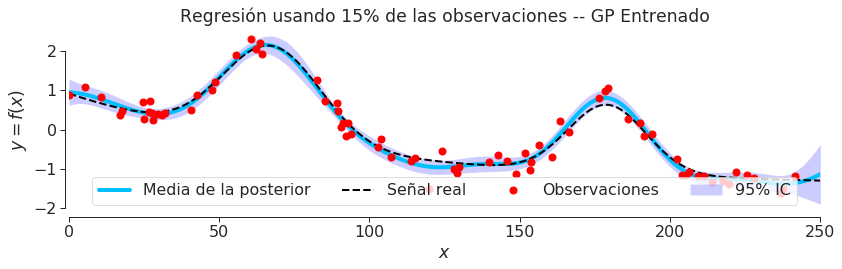

In [34]:
#Graficar nuevamente con los hiperparámetros encontrados mediante máxima verosimilitud
cov = SE(t, t, gamma=gamma_1, sigma=sig_1)
cov_obs = SE(t_obs, t_obs, gamma=gamma_1, sigma=sig_1)
K_star = SE(t, t_obs, gamma=gamma_1, sigma=sig_1)
cGg = np.linalg.cholesky(cov_obs + sigma_y_GP**2 * np.identity(N_obs))
invGramg = np.dot(np.linalg.inv(cGg.T), np.linalg.inv(cGg))
temp = np.dot(K_star, invGramg)
y_model = np.dot(temp, y_obs)
v_model = np.diag(cov - np.dot(temp, K_star.T))
std_dev = np.sqrt(v_model)

#graficar estimación, observaciones y datos reales
fig = plt.figure(2, figsize=(figure_width, 4))
ax = plt.gca()
plt.plot(t, y_model, c='#00BFFF', lw=4, label='Media de la posterior')
plt.fill_between(
    t,
    y_model - 2 * std_dev,
    y_model + 2 * std_dev,
    facecolor='blue',
    alpha=0.2,
    label='95% IC')
plt.plot(t, y_real, color='black', ls='--', lw=2, label='Señal real')
plt.plot(t_obs, y_obs, 'r.', ms=14, label='Observaciones')
plt.legend(ncol=4, loc='lower center')

plt.xlabel(r'$x$')
# plt.ylabel(r'$y=f(x) + \eta$')
plt.ylabel(r'$y=f(x)$')
plt.xlim(0, 250)
plt.title('Regresión usando {}% de las observaciones -- GP Entrenado'.format(int(percent*100)))
plt.tight_layout()
sns.despine(offset=4, trim=True)

if savefigs: plt.savefig(out_path + prefix + 'gp_entrenado.pdf', bbox_inches='tight')

## Figuras para distintos kernels


In [35]:
n_points = 500
t = np.linspace(0, 100, n_points)
m = np.zeros(n_points)
sigma = 1
l = 1
alpha = 10
theta = [1/(2*l**2), alpha, sigma]

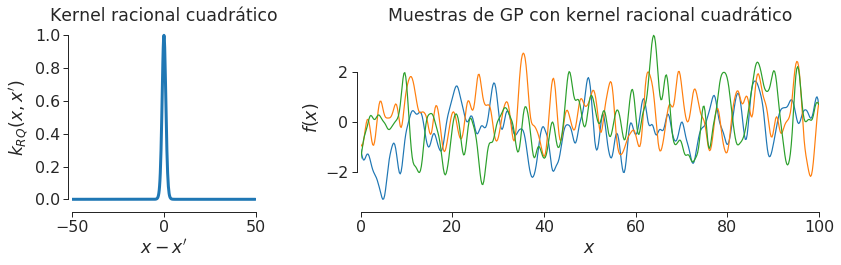

In [36]:
np.random.seed(1)
n_to_plot = 3

########################################################################
ker_name = 'RQ' # RQ, P
########################################################################

ker_list = {'RQ':RQ, 'P':P}

gram = kernels(t, t, theta, ker_list[ker_name])
samples = np.random.multivariate_normal(m, gram, size=n_to_plot)

fig = plt.figure(figsize=(figure_width, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 5])
ax0 = plt.subplot(gs[0])
ax0.plot(t - t[250], gram[250, :], lw=3)
ax0.set_xlim(-50, 50)
ax0.set_xlabel(r"$x-x'$")


ax1 = plt.subplot(gs[1])
ax1.plot(t, samples.T)
ax1.set_xlim(0, 100)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$f(x)$')

if ker_name=='RQ':
    ax0.set_ylabel(r"$k_{RQ}(x, x')$")
    ax0.set_title('Kernel racional cuadrático')
    ax1.set_title('Muestras de GP con kernel racional cuadrático')
    outname = 'gp_muestras_RQ.pdf'

if ker_name=='P':
    ax0.set_ylabel(r"$k_{P}(x, x')$")
    ax0.set_title('Kernel periódico')
    ax1.set_title('Muestras de GP con kernel periódico')
    outname = 'gp_muestras_P.pdf'

sns.despine(offset=4, trim=True)

plt.tight_layout()
if savefigs: plt.savefig(out_path + prefix + outname, bbox_inches='tight')

# Classification gp

In [37]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics.classification import accuracy_score, log_loss
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [38]:
from sklearn.datasets import make_moons

In [39]:
D = np.loadtxt('datos/datosT3.txt', delimiter=',')

X = D[:2, :].T
y = D[2, :].astype(int)

In [40]:
# X, y = make_moons(n_samples=500, noise=.2, random_state=666)

In [41]:
train_size = int(len(y) * 0.4)

In [42]:
gp_clf = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
gp_clf.fit(X[:train_size, :], y[:train_size])

GaussianProcessClassifier(copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1), max_iter_predict=100,
             multi_class='one_vs_rest', n_jobs=None,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False)

In [43]:
print("Accuracy: {}".format(accuracy_score(y[train_size:], gp_clf.predict(X[train_size:, :]))))

Accuracy: 0.955


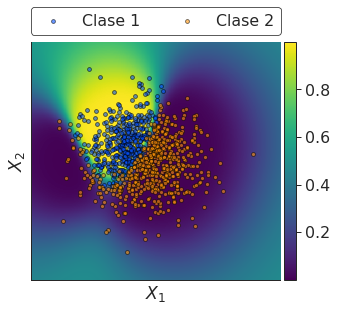

In [44]:
h = .02

#  create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the predicted probabilities. For that, we will assign a color to
# each point in the mesh [x_min, m_max]x[y_min, y_max].

Z = gp_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

plt.figure(figsize=(5, 5))
ax = plt.gca()
# Put the result into a color plot
Z = Z.reshape((xx.shape[0], xx.shape[1], 2))
im = plt.imshow(
    Z[:, :, 0],
    extent=(x_min, x_max, y_min, y_max),
    origin="lower",
    cmap='viridis')

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=15, c='xkcd:electric blue',
            edgecolors=(0, 0, 0), label='Clase 1', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=15, c='xkcd:tangerine',
            edgecolors=(0, 0, 0), label='Clase 2', alpha=0.6)

plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.18), frameon=True, edgecolor='k', ncol=2)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

sns.despine(offset=0)

plt.tight_layout()
if savefigs: plt.savefig(out_path + prefix + 'gp_classificacion.pdf', bbox_inches='tight')

# CHAPTER 8:Clustering

In [41]:
# chapter prefix for figures
prefix = 'cap7_'

In [9]:
# create dataset
np.random.seed(42)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=2, centers=4, cluster_std=0.5, random_state=0)
rng = np.random.RandomState(13)
X = np.dot(X, rng.randn(2, 2))

In [10]:
mycmap = 'viridis'

In [26]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)

y_kmeans = kmeans.predict(X)

In [65]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    """
    function to plot k means
    """
    labels = kmeans.fit_predict(X)

    labels_corrected = labels+(y[0]-labels[0])*((labels==labels[0]).astype(int))+(y[1]-labels[1])*((labels==labels[1]).astype(int))+(y[2]-labels[2])*((labels==labels[2]).astype(int))+(y[3]-labels[3])*((labels==labels[3]).astype(int))
    print(labels[:4])

    # plot the input data
    ax = ax or plt.gca()
#     ax.axis('equal')
    
    plt.plot(X[labels_corrected==0, 0], X[labels_corrected==0, 1],
             'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'Pred.C$_1$',alpha=0.9)
    plt.plot(X[labels_corrected==1, 0], X[labels_corrected==1, 1],
             'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'Pred.C$_2$', alpha=0.9)
    plt.plot(X[labels_corrected==2, 0], X[labels_corrected==2, 1],
             'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'Pred.C$_3$', alpha=0.9)
    plt.plot(X[labels_corrected==3, 0], X[labels_corrected==3, 1],
             'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'Pred.C$_4$', alpha=0.9)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    # ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    labels_corrected = labels+(y[0]-labels[0])*((labels==labels[0]).astype(int))+(y[1]-labels[1])*((labels==labels[1]).astype(int))+(y[2]-labels[2])*((labels==labels[2]).astype(int))+(y[3]-labels[3])*((labels==labels[3]).astype(int))
    
    if label:
            ax.plot(X[labels_corrected==0, 0], X[labels_corrected==0, 1],
             'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'Pred.C$_1$', alpha=0.9)
            ax.plot(X[labels_corrected==1, 0], X[labels_corrected==1, 1],
             'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'Pred.C$_2$', alpha=0.9)
            ax.plot(X[labels_corrected==2, 0], X[labels_corrected==2, 1],
             'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'Pred.C$_3$', alpha=0.9)
            ax.plot(X[labels_corrected==3, 0], X[labels_corrected==3, 1],
             'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'Pred.C$_4$', alpha=0.9)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor, ax=ax)
    
    return ax

## Real vs Kmeans

[0 1 3 2]


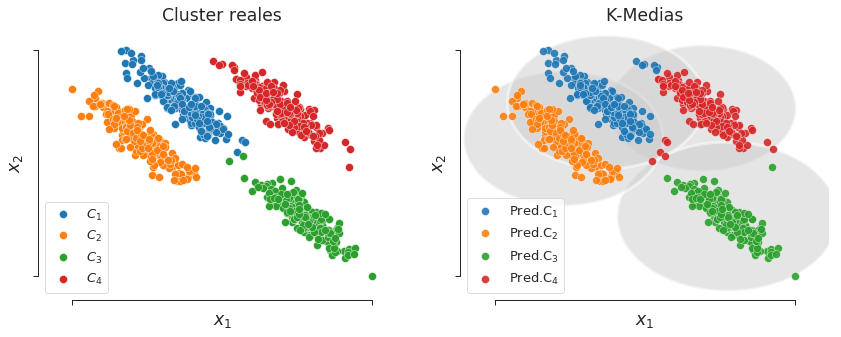

In [79]:
plt.figure(figsize=(figure_width, 5))

# ------------
plt.subplot(121)

plt.plot(X[y==0, 0], X[y==0, 1], 'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'$C_1$')
plt.plot(X[y==1, 0], X[y==1, 1], 'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'$C_2$')
plt.plot(X[y==2, 0], X[y==2, 1], 'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'$C_3$')
plt.plot(X[y==3, 0], X[y==3, 1], 'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'$C_4$')

plt.legend(fontsize=13, loc='lower left')

plt.xlim([X.min(0)[0] - .5, X.max(0)[0] + .5])
plt.xticks([X.min(0)[0], X.max(0)[0]], labels=[])
plt.xlabel(r'$x_1$')

plt.ylim([X.min(0)[1] - .5, X.max(0)[1] + .5])
plt.yticks([X.min(0)[1], X.max(0)[1]], labels=[])
plt.ylabel(r'$x_2$')

sns.despine(offset=0.5, trim=True)

plt.title('Cluster reales')

# ------------
plt.subplot(122)

from scipy.spatial.distance import cdist

plot_kmeans(kmeans, X, n_clusters=3)

plt.legend(fontsize=13)

plt.xlim([X.min(0)[0] - .5, X.max(0)[0] + .5])
plt.xticks([X.min(0)[0], X.max(0)[0]], labels=[])
plt.xlabel(r'$x_1$')

plt.ylim([X.min(0)[1] - .5, X.max(0)[1] + .5])
plt.yticks([X.min(0)[1], X.max(0)[1]], labels=[])
plt.ylabel(r'$x_2$')

sns.despine(offset=0.5, trim=True)

plt.title('K-Medias')

plt.tight_layout()

if savefigs: plt.savefig(out_path + prefix + 'k_medias.pdf', bbox_inches='tight')

##  Real vs GMM

In [60]:
gmm = GMM(n_components=4, random_state=1).fit(X)
y_gmm = gmm.predict(X)

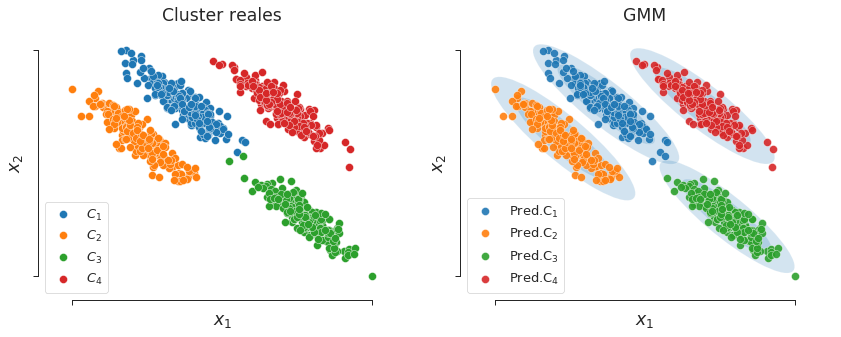

In [80]:
plt.figure(figsize=(figure_width, 5))

# ------------
plt.subplot(121)

plt.plot(X[y==0, 0], X[y==0, 1], 'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'$C_1$')
plt.plot(X[y==1, 0], X[y==1, 1], 'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'$C_2$')
plt.plot(X[y==2, 0], X[y==2, 1], 'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'$C_3$')
plt.plot(X[y==3, 0], X[y==3, 1], 'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'$C_4$')

plt.legend(fontsize=13, loc='lower left')

plt.xlim([X.min(0)[0] - .5, X.max(0)[0] + .5])
plt.xticks([X.min(0)[0], X.max(0)[0]], labels=[])
plt.xlabel(r'$x_1$')

plt.ylim([X.min(0)[1] - .5, X.max(0)[1] + .5])
plt.yticks([X.min(0)[1], X.max(0)[1]], labels=[])
plt.ylabel(r'$x_2$')

sns.despine(offset=0.5, trim=True)

plt.title('Cluster reales')

# ------------
ax = plt.subplot(122)

ax = plot_gmm(gmm, X, ax=ax)

plt.legend(fontsize=13)
plt.xlim([X.min(0)[0] - .5, X.max(0)[0] + .5])
plt.xticks([X.min(0)[0], X.max(0)[0]], labels=[])
plt.xlabel(r'$x_1$')

plt.ylim([X.min(0)[1] - .5, X.max(0)[1] + .5])
plt.yticks([X.min(0)[1], X.max(0)[1]], labels=[])
plt.ylabel(r'$x_2$')

sns.despine(offset=0.5, trim=True)

ax.set_title('GMM')

plt.tight_layout()

if savefigs: plt.savefig(out_path + prefix + 'gmm.pdf', bbox_inches='tight')

## Real vs DBSCAN

In [68]:
db = DBSCAN(eps=0.2, min_samples=7).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
y_dbscan = db.labels_
labels = y_dbscan
labels_corrected = labels+(y[0]-labels[0])*((labels==labels[0]).astype(int))+(y[1]-labels[1])*((labels==labels[1]).astype(int))+(y[2]-labels[2])*((labels==labels[2]).astype(int))+(y[3]-labels[3])*((labels==labels[3]).astype(int))


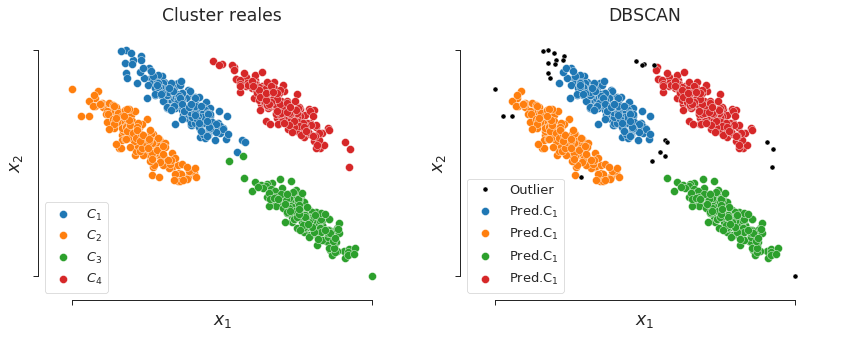

In [81]:
plt.figure(figsize=(figure_width, 5))

# ------------
plt.subplot(121)

plt.plot(X[y==0, 0], X[y==0, 1], 'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'$C_1$')
plt.plot(X[y==1, 0], X[y==1, 1], 'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'$C_2$')
plt.plot(X[y==2, 0], X[y==2, 1], 'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'$C_3$')
plt.plot(X[y==3, 0], X[y==3, 1], 'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'$C_4$')

plt.legend(fontsize=13, loc='lower left')

plt.xlim([X.min(0)[0] - .5, X.max(0)[0] + .5])
plt.xticks([X.min(0)[0], X.max(0)[0]], labels=[])
plt.xlabel(r'$x_1$')

plt.ylim([X.min(0)[1] - .5, X.max(0)[1] + .5])
plt.yticks([X.min(0)[1], X.max(0)[1]], labels=[])
plt.ylabel(r'$x_2$')

sns.despine(offset=0.5, trim=True)

plt.title('Cluster reales')

# ------------
plt.subplot(122)

plt.plot(X[labels_corrected==-1, 0], X[labels_corrected==-1, 1],
         'o', markeredgecolor='w',c='k', markeredgewidth=0.4, ms=5, label='Outlier', zorder=5)
plt.plot(X[labels_corrected==0, 0], X[labels_corrected==0, 1],
         'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'Pred.C$_1$')
plt.plot(X[labels_corrected==1, 0], X[labels_corrected==1, 1],
         'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'Pred.C$_1$')
plt.plot(X[labels_corrected==2, 0], X[labels_corrected==2, 1],
         'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'Pred.C$_1$')
plt.plot(X[labels_corrected==3, 0], X[labels_corrected==3, 1],
         'o', markeredgecolor='w', markeredgewidth=0.4, ms=8, label=r'Pred.C$_1$')

plt.legend(fontsize=13, loc='lower left')
plt.title('DBSCAN')

plt.xlim([X.min(0)[0] - .5, X.max(0)[0] + .5])
plt.xticks([X.min(0)[0], X.max(0)[0]], labels=[])
plt.xlabel(r'$x_1$')

plt.ylim([X.min(0)[1] - .5, X.max(0)[1] + .5])
plt.yticks([X.min(0)[1], X.max(0)[1]], labels=[])
plt.ylabel(r'$x_2$')

sns.despine(offset=0.5, trim=True)

plt.tight_layout()

if savefigs: plt.savefig(out_path + prefix + 'dbscan.pdf', bbox_inches='tight')

## Kernel pca

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

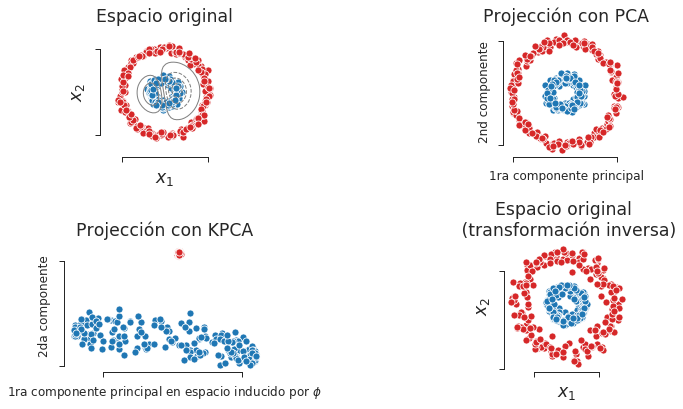

In [42]:
np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure(figsize=(figure_width, 6))

plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c=sns.color_palette()[3],
            s=50, edgecolor='w')
plt.scatter(X[blues, 0], X[blues, 1], c=sns.color_palette()[0],
            s=50, edgecolor='w')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')


plt.xticks([-1, 1], labels=[])
plt.yticks([-1, 1], labels=[])

sns.despine(offset=0.5, trim=True)

plt.subplot(2, 2, 2, aspect='equal')

plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c=sns.color_palette()[3],
            s=50, edgecolor='w')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c=sns.color_palette()[0],
            s=50, edgecolor='w')

plt.xticks([-1, 1], labels=[])
plt.yticks([-1, 1], labels=[])

plt.title("Projección con PCA")
plt.xlabel("1ra componente principal", fontsize=12)
plt.ylabel("2nd componente", fontsize=12)

sns.despine(offset=0.5, trim=True)

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c=sns.color_palette()[3],
            s=50, edgecolor='w')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c=sns.color_palette()[0],
            s=50, edgecolor='w')
plt.title("Projección con KPCA")
plt.xlabel(r"1ra componente principal en espacio inducido por $\phi$", fontsize=12)
plt.ylabel("2da componente", fontsize=12)

plt.xticks([-.5, .5], labels=[])
plt.yticks([-.5, .25], labels=[])

sns.despine(offset=0.5, trim=True)

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c=sns.color_palette()[3],
            s=50, edgecolor='w')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c=sns.color_palette()[0],
            s=50, edgecolor='w')
plt.title('Espacio original \n (transformación inversa)')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.xticks([-.5, .5], labels=[])
plt.yticks([-1, .5], labels=[])

sns.despine(offset=0.5, trim=True)

plt.tight_layout()

if savefigs: plt.savefig(out_path + prefix + 'kpca.pdf', bbox_inches='tight')